In [2]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
np.power(2,np.arange(0,5))

array([ 1,  2,  4,  8, 16])

In [4]:
def generate_money(num=6):
    return  np.power(2,np.arange(0,num))*500

In [5]:
money = generate_money()

In [35]:
amoney = np.random.choice(money)
aind = np.where(amoney==money)[0]
bind = -1
if (aind!=0) & (aind!=5):
    bind = aind+np.random.choice([1,-1])
elif aind==0:
    bind = 1
elif aind==5:
    bind = 4

In [77]:
bmoney = money[bind]
bmoney

In [6]:
def generate_result():
    money = generate_money()
    amoney = np.random.choice(money)
    aind = np.where(amoney==money)[0]
    bind = -1
    if (aind!=0) & (aind!=5):
        bind = aind+np.random.choice([1,-1])
    elif aind==0:
        bind = 1
    elif aind==5:
        bind = 4
    bmoney = money[bind]
    return amoney,int(bmoney)

In [ ]:
generate_result()

In [7]:
epoch = 1000000
resultarr = np.ndarray([epoch,2])
for i in tqdm(range(epoch)):
    tmp = generate_result()
    resultarr[i,0] = tmp[0]
    resultarr[i,1] = tmp[1]

100%|██████████| 1000000/1000000 [00:22<00:00, 44929.68it/s]


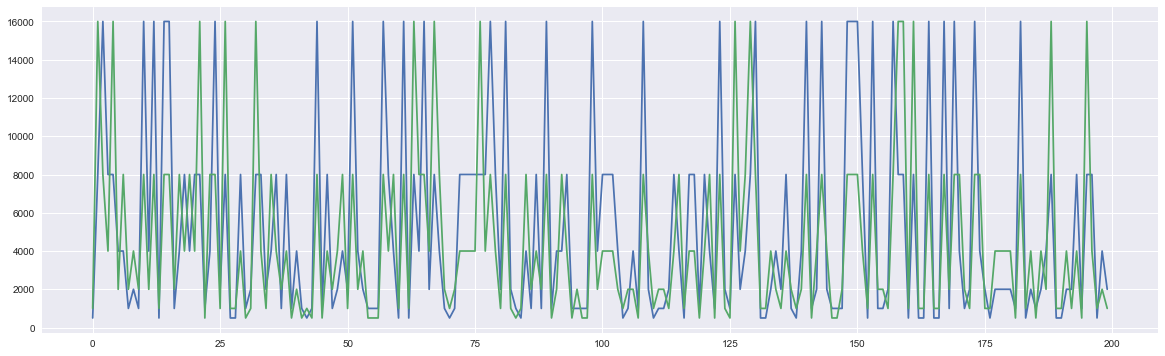

In [8]:
fig,ax=plt.subplots(1,figsize=(20,6))
ax.plot(resultarr[:200])

In [9]:
np.average(resultarr[:,0])

5253.4875

In [10]:
np.average(resultarr[:,1])

4626.378

(array([ 83263.,      0.,      0.,      0.,      0.,  83218.,      0.,
         83672.,  83548., 166443.,  83040.,  83043.,  83416.,      0.,
             0.,  83513.,      0.,      0.,      0., 166844.]),
 array([-8000., -7200., -6400., -5600., -4800., -4000., -3200., -2400.,
        -1600.,  -800.,     0.,   800.,  1600.,  2400.,  3200.,  4000.,
         4800.,  5600.,  6400.,  7200.,  8000.]),
 <a list of 20 Patch objects>)

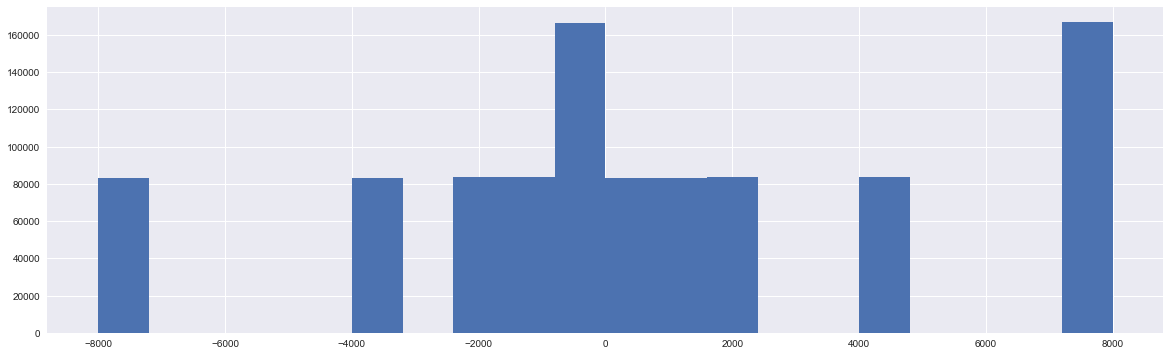

In [11]:
fig,ax=plt.subplots(1,figsize=(20,6))
ax.hist(resultarr[:,0] - resultarr[:,1],bins=20)

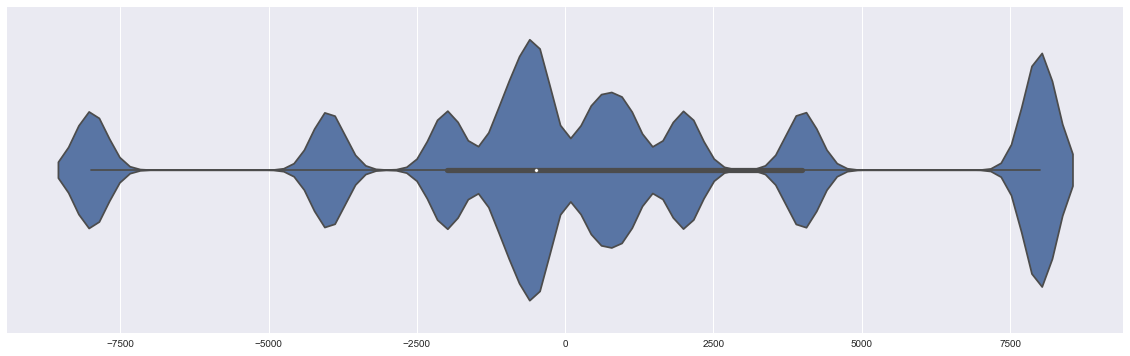

In [12]:
fig,ax=plt.subplots(1,figsize=(20,6))
sns.violinplot(resultarr[:,0] - resultarr[:,1])

### 精炼博弈  不会换
- 如何设计模型 用强化学习  优化策略  让两个人学会策略，利润最大化？
- B是得到结果再决定换不换，所以不需要训练，需要训练A使得A掌握换或者不换的策略

In [93]:
class game_theory():
    def __init__(self,nums):
        self.num = nums
    def generate_money(num):
        return  np.power(2,np.arange(0,num))*500
    def generate_result(self):
        money = generate_money(self.num)
        amoney = np.random.choice(money)
        aind = np.where(amoney==money)[0]
        bind = -1
        if (aind!=0) & (aind!=5):
            bind = aind+np.random.choice([1,-1])
        elif aind==0:
            bind = 1
        elif aind==5:
            bind = 4
        bmoney = int(money[bind])
        return amoney,bmoney
    def decision(self):
        amoney,bmoney = generate_result()
        decisionb = 1 if amoney >  bmoney else 0
        resultmoneya = [amoney,amoney]
        resultmoneyb = [bmoney,bmoney]
        decisiona = [0,1]
        for i in range(2):
            if decisiona[i] ==1:
                if decisiona[i]*decisionb ==1:
                    resultmoneya[i],resultmoneyb[i] = bmoney,amoney
        return resultmoneya[1] - resultmoneya[0] #a换的结果

In [94]:
game1 = game_theory(6)
game1.decision()

-500

In [96]:
epoch = 100000
resultarr = np.ndarray([epoch,1])
for i in tqdm(range(epoch)):
    game1 = game_theory(6)
    resultarr[i] = game1.decision()

100%|██████████| 100000/100000 [00:03<00:00, 30684.82it/s]


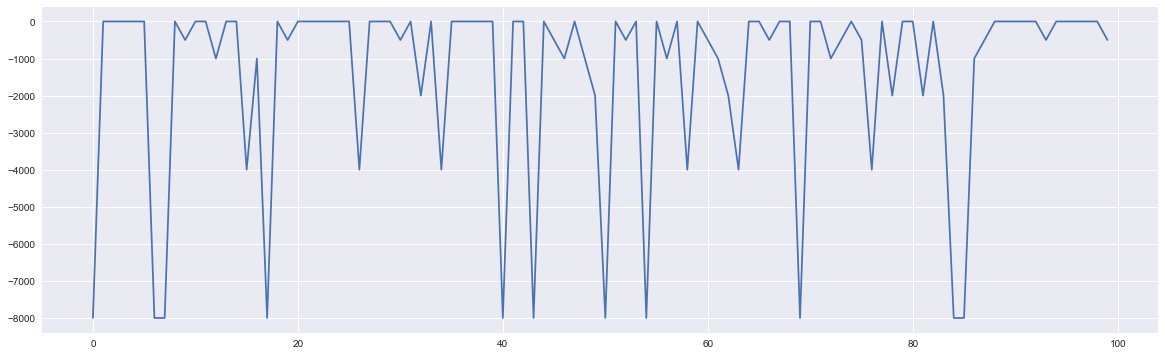

In [101]:
fig,ax=plt.subplots(1,figsize=(20,6))
ax.plot(resultarr[:100])

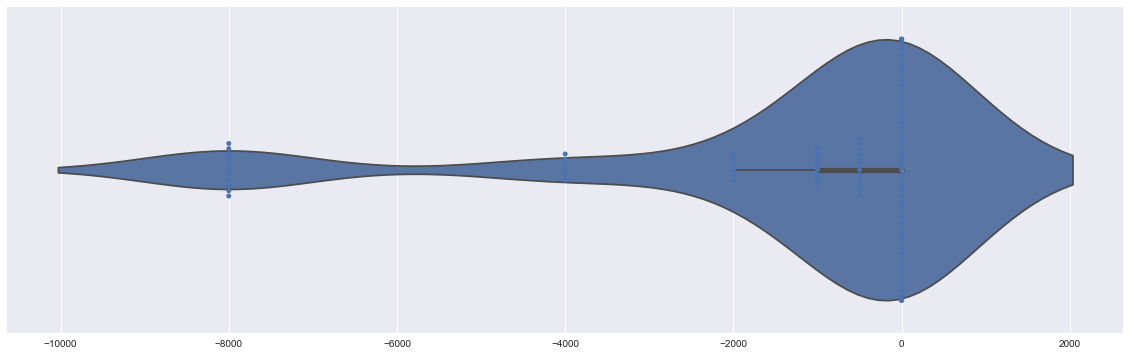

In [107]:
fig,ax=plt.subplots(1,figsize=(20,6))
sns.violinplot(resultarr[:100])
sns.swarmplot(resultarr.ravel()[:100])

In [79]:
import time

N_STATES = 6   # 1维世界的宽度
ACTIONS = ['switch', 'hold']     # 探索者的可用动作
EPSILON = 0.9   # 贪婪度 greedy
ALPHA = 0.1     # 学习率
GAMMA = 0.9    # 奖励递减值
MAX_EPISODES = 13   # 最大回合数
FRESH_TIME = 0.3 

In [13]:
import numpy as np
import pandas as pd
import time

N_STATES = 6   # 1维世界的宽度
ACTIONS = ['left', 'right']     # 探索者的可用动作
EPSILON = 0.9   # 贪婪度 greedy
ALPHA = 0.1     # 学习率
GAMMA = 0.9    # 奖励递减值
MAX_EPISODES = 13   # 最大回合数
FRESH_TIME = 0.3 

In [14]:
def build_q_table(n_states, actions):
    table = pd.DataFrame(
        np.zeros((n_states, len(actions))),     # q_table 全 0 初始
        columns=actions,    # columns 对应的是行为名称
    )
    return table

In [16]:
build_q_table(N_STATES, ACTIONS)

,left,right
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0


In [17]:
def choose_action(state, q_table):
    state_actions = q_table.iloc[state, :]  # 选出这个 state 的所有 action 值
    if (np.random.uniform() > EPSILON) or (state_actions.all() == 0):  # 非贪婪 or 或者这个 state 还没有探索过
        action_name = np.random.choice(ACTIONS)
    else:
        action_name = state_actions.argmax()    # 贪婪模式
    return action_name

In [18]:
def get_env_feedback(S, A):
    # This is how agent will interact with the environment
    if A == 'right':    # move right
        if S == N_STATES - 2:   # terminate
            S_ = 'terminal'
            R = 1
        else:
            S_ = S + 1
            R = 0
    else:   # move left
        R = 0
        if S == 0:
            S_ = S  # reach the wall
        else:
            S_ = S - 1
    return S_, R

In [21]:
def update_env(S, episode, step_counter):
    # This is how environment be updated
    env_list = ['-']*(N_STATES-1) + ['T']   # '---------T' our environment
    if S == 'terminal':
        interaction = 'Episode %s: total_steps = %s' % (episode+1, step_counter)
        print('\r{}'.format(interaction))
        time.sleep(2)
        print('\r                                ')
    else:
        env_list[S] = 'o'
        interaction = ''.join(env_list)
        print('\r{}'.format(interaction))
        time.sleep(FRESH_TIME)

In [22]:
def rl():
    q_table = build_q_table(N_STATES, ACTIONS)  # 初始 q table
    for episode in range(MAX_EPISODES):     # 回合
        step_counter = 0
        S = 0   # 回合初始位置
        is_terminated = False   # 是否回合结束
        update_env(S, episode, step_counter)    # 环境更新
        while not is_terminated:

            A = choose_action(S, q_table)   # 选行为
            S_, R = get_env_feedback(S, A)  # 实施行为并得到环境的反馈
            q_predict = q_table.loc[S, A]    # 估算的(状态-行为)值
            if S_ != 'terminal':
                q_target = R + GAMMA * q_table.iloc[S_, :].max()   #  实际的(状态-行为)值 (回合没结束)
            else:
                q_target = R     #  实际的(状态-行为)值 (回合结束)
                is_terminated = True    # terminate this episode

            q_table.loc[S, A] += ALPHA * (q_target - q_predict)  #  q_table 更新
            S = S_  # 探索者移动到下一个 state

            update_env(S, episode, step_counter+1)  # 环境更新

            step_counter += 1
    return q_table

In [23]:
if __name__ == "__main__":
    q_table = rl()
    print('\r\nQ-table:\n')
    print(q_table)

o----T
-o---T
--o--T
-o---T
--o--T
-o---T
o----T
o----T
o----T
-o---T
--o--T
---o-T
----oT
Episode 1: total_steps = 13
                                
o----T
o----T
-o---T
--o--T
---o-T
--o--T
-o---T
--o--T
-o---T
--o--T
-o---T
--o--T
---o-T
----oT
Episode 2: total_steps = 14
                                
o----T
-o---T
--o--T
-o---T
--o--T
-o---T
o----T
o----T
o----T
-o---T
--o--T
-o---T
--o--T
---o-T
--o--T
---o-T
----oT
---o-T
----oT
Episode 3: total_steps = 19
                                
o----T
o----T
o----T
-o---T
o----T
-o---T
o----T
-o---T
o----T
o----T
o----T
-o---T
o----T
-o---T
o----T
o----T
-o---T
o----T
-o---T
o----T
-o---T
--o--T
---o-T
----oT
---o-T
----oT
---o-T
----oT
Episode 4: total_steps = 28
                                
o----T
o----T
o----T
-o---T
--o--T
-o---T
--o--T
---o-T
----oT
Episode 5: total_steps = 9
                                
o----T
-o---T
o----T
-o---T
o----T
o----T
-o---T
--o--T
---o-T
----oT
Episode 6: total_steps = 10
                 